In [1]:
from __future__ import division, print_function

import csv
import warnings
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
from xgboost import plot_importance, XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.feature_selection import SelectFromModel

In [3]:
warnings.filterwarnings("ignore")

### Read the data from the task data file.

In [4]:
## https://pandas.pydata.org/
def read_data_file(filename):
    data = pd.read_csv(filename)
    return data
dataset = read_data_file('./task_data.csv')

### Check the data properties i.e. Identifying the important features within the provided data
### Benifits :
#### 1.) help to concentrate on important features thus helping in building the model
#### 2.) Get rid of features which are irrelavent and will not contribute to the model performance.

In [5]:
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sample index  400 non-null    object 
 1   class_label   400 non-null    float64
 2   sensor0       400 non-null    float64
 3   sensor1       400 non-null    float64
 4   sensor2       400 non-null    float64
 5   sensor3       400 non-null    float64
 6   sensor4       400 non-null    float64
 7   sensor5       400 non-null    float64
 8   sensor6       400 non-null    float64
 9   sensor7       400 non-null    float64
 10  sensor8       400 non-null    float64
 11  sensor9       400 non-null    float64
dtypes: float64(11), object(1)
memory usage: 37.6+ KB
None
       class_label     sensor0     sensor1     sensor2     sensor3  \
count   400.000000  400.000000  400.000000  400.000000  400.000000   
mean      0.000000    0.523661    0.509223    0.481238    0.509752   
std       1.001252    0.

### Split data into training features and labels

In [6]:
## Extracting Labels from the data
Y = dataset['class_label']

In [7]:
## Extracting Features from the data
dataset.drop(['sample index','class_label'],axis=1,inplace=True)
X = dataset

### Creating a Correlation Matrix to check out the correlation between the sensors in the dataset

In [8]:
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
corr_matrix = dataset.corr()

#### Heatmap of the correlation matrix

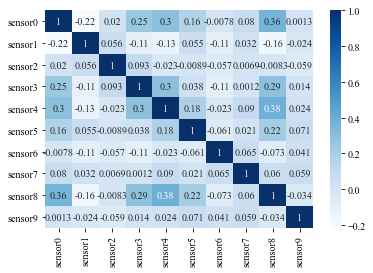

In [9]:
## https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(corr_matrix, cmap='Blues', annot=True)
plt.show()
plt.close()

## split data into train and test dataset

In [10]:
## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Defining a model to rank the sensors according to their importance/predictive power with respect to the class labels of the samples.
### Testing the Accuracy and Efficiency of model

In [11]:
## https://www.kaggle.com/dansbecker/xgboost
## https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7
## https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

### XGBoost Classifier Model

In [12]:
## instantiate model
model = XGBClassifier(n_estimators=300, learning_rate=0.1)

In [13]:
## Training model using training data set
model.fit(X_train, y_train, eval_metric=['error','logloss'], early_stopping_rounds=10,
          eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-error:0.01875	validation_0-logloss:0.60808	validation_1-error:0.05000	validation_1-logloss:0.61301
[1]	validation_0-error:0.01250	validation_0-logloss:0.53662	validation_1-error:0.06250	validation_1-logloss:0.54703
[2]	validation_0-error:0.00937	validation_0-logloss:0.47741	validation_1-error:0.06250	validation_1-logloss:0.49502
[3]	validation_0-error:0.00937	validation_0-logloss:0.42701	validation_1-error:0.06250	validation_1-logloss:0.44998
[4]	validation_0-error:0.00937	validation_0-logloss:0.38263	validation_1-error:0.06250	validation_1-logloss:0.40967
[5]	validation_0-error:0.00625	validation_0-logloss:0.34422	validation_1-error:0.06250	validation_1-logloss:0.37597
[6]	validation_0-error:0.00937	validation_0-logloss:0.31112	validation_1-error:0.06250	validation_1-logloss:0.34479
[7]	validation_0-error:0.00937	validation_0-logloss:0.28213	validation_1-error:0.06250	validation_1-logloss:0.31863
[8]	validation_0-error:0.00937	validation_0-logloss:0.25662	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

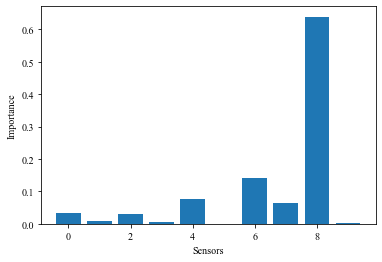

In [14]:
# print('Model Feature Importance', model.feature_importances_)
plt.bar(range(len(model.feature_importances_)),model.feature_importances_)
plt.xlabel('Sensors')
plt.ylabel('Importance')
plt.show()
plt.close()

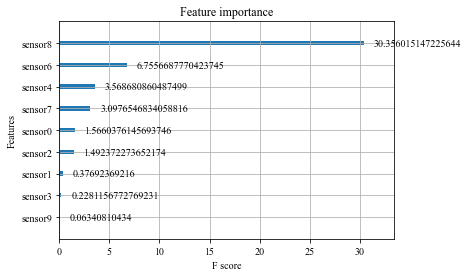

In [15]:
## Visualizing the importance of each feature/sensor in the data set with their F-score.
plot_importance(model,importance_type='gain')
plt.show()
plt.close()

In [16]:
## Ranking of sensors based on their importance value in a reverse order
rank_sensors = sorted(zip(model.feature_importances_, X.columns), reverse=True)
for label in rank_sensors:
    print('For {} Predictive Score is {}'.format(label[1], label[0]))

For sensor8 Predictive Score is 0.6390084028244019
For sensor6 Predictive Score is 0.1422100067138672
For sensor4 Predictive Score is 0.0751224085688591
For sensor7 Predictive Score is 0.0652070865035057
For sensor0 Predictive Score is 0.03296583145856857
For sensor2 Predictive Score is 0.03141513839364052
For sensor1 Predictive Score is 0.007934421300888062
For sensor3 Predictive Score is 0.004801942501217127
For sensor9 Predictive Score is 0.0013347704662010074
For sensor5 Predictive Score is 0.0


In [17]:
## Seperating features and their importance values
scores = list(zip(*rank_sensors))[0]
sensors = list(zip(*rank_sensors))[1]
sensors_list = np.arange(len(sensors))

In [18]:
## Save ranked list of sensors and their importance values in a csv file
ranked_sensors = './ranked_sensors.csv'
header = ['Sensor', 'Importance value']
with open(ranked_sensors,'w') as output:
    ## create the csv writer
    write = csv.writer(output)
    ## write the header
    write.writerow(header)
    # write the row to csv file
    write.writerows(zip(sensors, scores))
output.close()

In [19]:
## Defining a function to plot the features vs importance score
## https://seaborn.pydata.org/generated/seaborn.barplot.html
def plot_features(features_list, importance_list, model_name, palette=None):
    sns.set()
    sns.set_style("whitegrid")
    plt.figure(figsize=(8, 4))
    sns.barplot(features_list, np.array(importance_list), palette=palette)
    plt.xticks(sensors_list, sensors)
    plt.ylabel('Importance Score')
    plt.title(model_name)
    plt.show()
    plt.close()

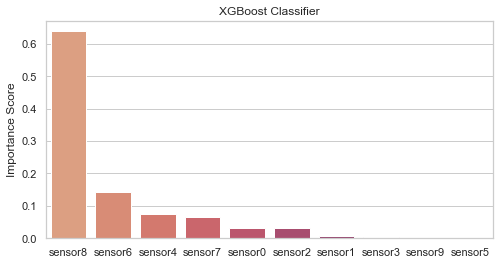

In [20]:
## Plot features with respect to their importance value
plot_features(sensors_list, scores, 'XGBoost Classifier', palette='flare')

In [21]:
## Evaluate the predicitions
predictions = model.predict(X_test)

In [22]:
## Mean Absolute error
## https://scikit-learn.org/stable/modules/model_evaluation.html
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 0.0


In [23]:
## Model Accuracy i.e how correct is the classifier?
accuracy = accuracy_score(y_test, predictions)
print('Accuracy of Model is : %.2f%%'%(accuracy*100.0))

Accuracy of Model is : 100.00%


### Scalabolity with respect to numbers of features
### Fitting model using each importance as threshold

In [24]:
## https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
thresholds = np.sort(model.feature_importances_)
for threshold in thresholds:
    ## Selecting feature based on threshold value
    select_feature = SelectFromModel(model, threshold = threshold, prefit = True)
    select_X_train = select_feature.transform(X_train)

    ## Train the model for each feature
    select_feature_model = XGBClassifier(eval_metric='logloss')
    select_feature_model.fit(select_X_train, y_train)

    ## Evaluating the model
    select_X_test = select_feature.transform(X_test)

    ## Evaluating the predicition
    feature_predicition = select_feature_model.predict(select_X_test)
    feature_predicition = [round(value) for value in feature_predicition]

    ## Evaluating the Accuracy
    feature_accuracy = accuracy_score(y_test, feature_predicition)
    print('Threshold = %.5f, n=%d, Accuracy : %.2f%%' % (threshold,select_X_train.shape[1],feature_accuracy*100.0))

Threshold = 0.00000, n=10, Accuracy : 98.75%
Threshold = 0.00133, n=9, Accuracy : 98.75%
Threshold = 0.00480, n=8, Accuracy : 98.75%
Threshold = 0.00793, n=7, Accuracy : 98.75%
Threshold = 0.03142, n=6, Accuracy : 98.75%
Threshold = 0.03297, n=5, Accuracy : 98.75%
Threshold = 0.06521, n=4, Accuracy : 98.75%
Threshold = 0.07512, n=3, Accuracy : 100.00%
Threshold = 0.14221, n=2, Accuracy : 100.00%
Threshold = 0.63901, n=1, Accuracy : 82.50%


## Let's Discuss Other Models which can be used for the same studies

## Second Model: Random Forest

In [25]:
## https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
## Evaluate the predicitions
rf_predictions = random_forest.predict(X_test)

In [27]:
## Mean Absolute error
print("Mean Absolute Error : " + str(mean_absolute_error(rf_predictions, y_test)))

Mean Absolute Error : 0.025


In [28]:
## Model Accuracy i.e how correct is the classifier?
rf_accuracy = accuracy_score(y_test, rf_predictions)
print('Accuracy of Random Forest Model is : %.2f%%'%(rf_accuracy*100.0))

Accuracy of Random Forest Model is : 98.75%


In [29]:
## Extract Feature Importance Value and Rank them in a reverse order
rank_rf = sorted(zip(random_forest.feature_importances_, X.columns), reverse=True)
for label in rank_rf:
    print('For RandomForest {} Predictive Score is {}'.format(label[1], label[0]))

For RandomForest sensor8 Predictive Score is 0.33532475785277066
For RandomForest sensor6 Predictive Score is 0.1897512311093335
For RandomForest sensor4 Predictive Score is 0.1528592312391694
For RandomForest sensor0 Predictive Score is 0.12274676633352821
For RandomForest sensor2 Predictive Score is 0.05149069321463027
For RandomForest sensor3 Predictive Score is 0.0487155039099691
For RandomForest sensor1 Predictive Score is 0.03855544047014551
For RandomForest sensor9 Predictive Score is 0.022698993370339766
For RandomForest sensor7 Predictive Score is 0.020028362315341015
For RandomForest sensor5 Predictive Score is 0.017829020184772535


In [30]:
## Seperating features and their importance values
scores_rf = list(zip(*rank_rf))[0]
sensors_rf = list(zip(*rank_rf))[1]
sensors_rf_list = np.arange(len(sensors_rf))

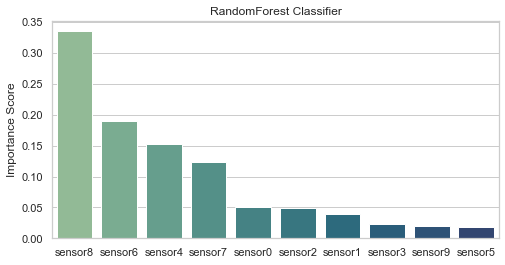

In [31]:
## Plot features with respect to their importance value
plot_features(sensors_rf_list, scores_rf, 'RandomForest Classifier', palette='crest')

In [32]:
## https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
thresholds = np.sort(random_forest.feature_importances_)
for threshold in thresholds:
    ## Selecting feature based on threshold value
    select_feature = SelectFromModel(random_forest, threshold = threshold, prefit = True)
    select_X_train = select_feature.transform(X_train)

    ## Train the model for each feature
    select_feature_model = RandomForestClassifier()
    select_feature_model.fit(select_X_train, y_train)

    ## Evaluating the model
    select_X_test = select_feature.transform(X_test)

    ## Evaluating the predicition
    feature_predicition = select_feature_model.predict(select_X_test)
    feature_predicition = [round(value) for value in feature_predicition]

    ## Evaluating the Accuracy
    feature_accuracy = accuracy_score(y_test, feature_predicition)
    print('Threshold = %.5f, n=%d, Accuracy : %.2f%%' % (threshold,select_X_train.shape[1],feature_accuracy*100.0))

Threshold = 0.01783, n=10, Accuracy : 97.50%
Threshold = 0.02003, n=9, Accuracy : 98.75%
Threshold = 0.02270, n=8, Accuracy : 98.75%
Threshold = 0.03856, n=7, Accuracy : 98.75%
Threshold = 0.04872, n=6, Accuracy : 98.75%
Threshold = 0.05149, n=5, Accuracy : 100.00%
Threshold = 0.12275, n=4, Accuracy : 97.50%
Threshold = 0.15286, n=3, Accuracy : 98.75%
Threshold = 0.18975, n=2, Accuracy : 100.00%
Threshold = 0.33532, n=1, Accuracy : 75.00%


## Third Model :  AdaBoost

In [33]:
## https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [34]:
## Estimating the performace of AdaBooster Clasifier
ada_prediction = adaboost.predict(X_test)

In [35]:
## Mean Absolute error
print("Mean Absolute Error : " + str(mean_absolute_error(ada_prediction, y_test)))

Mean Absolute Error : 0.0


In [36]:
## Model Accuracy i.e how correct is the classifier?
ada_accuracy = accuracy_score(y_test, ada_prediction)
print('Accuracy of AdaBoost Model is : %.2f%%' % (ada_accuracy*100.0))

Accuracy of AdaBoost Model is : 100.00%


In [37]:
## Extract Feature Importance Value and Rank them in a reverse order
rank_ada = sorted(zip(adaboost.feature_importances_, X.columns), reverse=True)
for label in rank_ada:
    print('For AdaBoost {} Predictive Score is {}'.format(label[1], label[0]))

For AdaBoost sensor6 Predictive Score is 0.94
For AdaBoost sensor8 Predictive Score is 0.02
For AdaBoost sensor4 Predictive Score is 0.02
For AdaBoost sensor0 Predictive Score is 0.02
For AdaBoost sensor9 Predictive Score is 0.0
For AdaBoost sensor7 Predictive Score is 0.0
For AdaBoost sensor5 Predictive Score is 0.0
For AdaBoost sensor3 Predictive Score is 0.0
For AdaBoost sensor2 Predictive Score is 0.0
For AdaBoost sensor1 Predictive Score is 0.0


In [38]:
## Seperating features and their importance values
scores_ada = list(zip(*rank_ada))[0]
sensors_ada = list(zip(*rank_ada))[1]
sensors_ada_list = np.arange(len(sensors_ada))

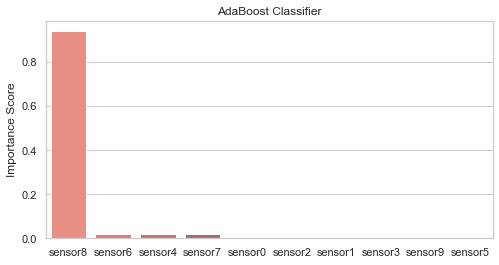

In [39]:
## Plot features with respect to their importance value
plot_features(sensors_ada_list, scores_ada, 'AdaBoost Classifier', palette='dark:salmon_r')

In [40]:
## https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
thresholds = np.sort(adaboost.feature_importances_)
for threshold in thresholds:
    ## Selecting feature based on threshold value
    select_feature = SelectFromModel(adaboost, threshold = threshold, prefit = True)
    select_X_train = select_feature.transform(X_train)

    ## Train the model for each feature
    select_feature_model = AdaBoostClassifier()
    select_feature_model.fit(select_X_train, y_train)

    ## Evaluating the model
    select_X_test = select_feature.transform(X_test)

    ## Evaluating the predictions
    feature_prediction = select_feature_model.predict(select_X_test)
    feature_prediction = [round(value) for value in feature_prediction]

    ## Evaluating the Accuracy
    feature_accuracy = accuracy_score(y_test, feature_prediction)
    print('Threshold = %.5f, n=%d, Accuracy : %.2f%%' % (threshold,select_X_train.shape[1],feature_accuracy*100.0))

Threshold = 0.00000, n=10, Accuracy : 100.00%
Threshold = 0.00000, n=10, Accuracy : 100.00%
Threshold = 0.00000, n=10, Accuracy : 100.00%
Threshold = 0.00000, n=10, Accuracy : 100.00%
Threshold = 0.00000, n=10, Accuracy : 100.00%
Threshold = 0.00000, n=10, Accuracy : 100.00%
Threshold = 0.02000, n=4, Accuracy : 100.00%
Threshold = 0.02000, n=4, Accuracy : 100.00%
Threshold = 0.02000, n=4, Accuracy : 100.00%
Threshold = 0.94000, n=1, Accuracy : 100.00%
